<a href="https://colab.research.google.com/github/Soot3/Submissions/blob/master/NBA_YoungStars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **New NBA SuperStars: Is it time?**

*By Sooter Saalu*


---

SEP. 16. 2020

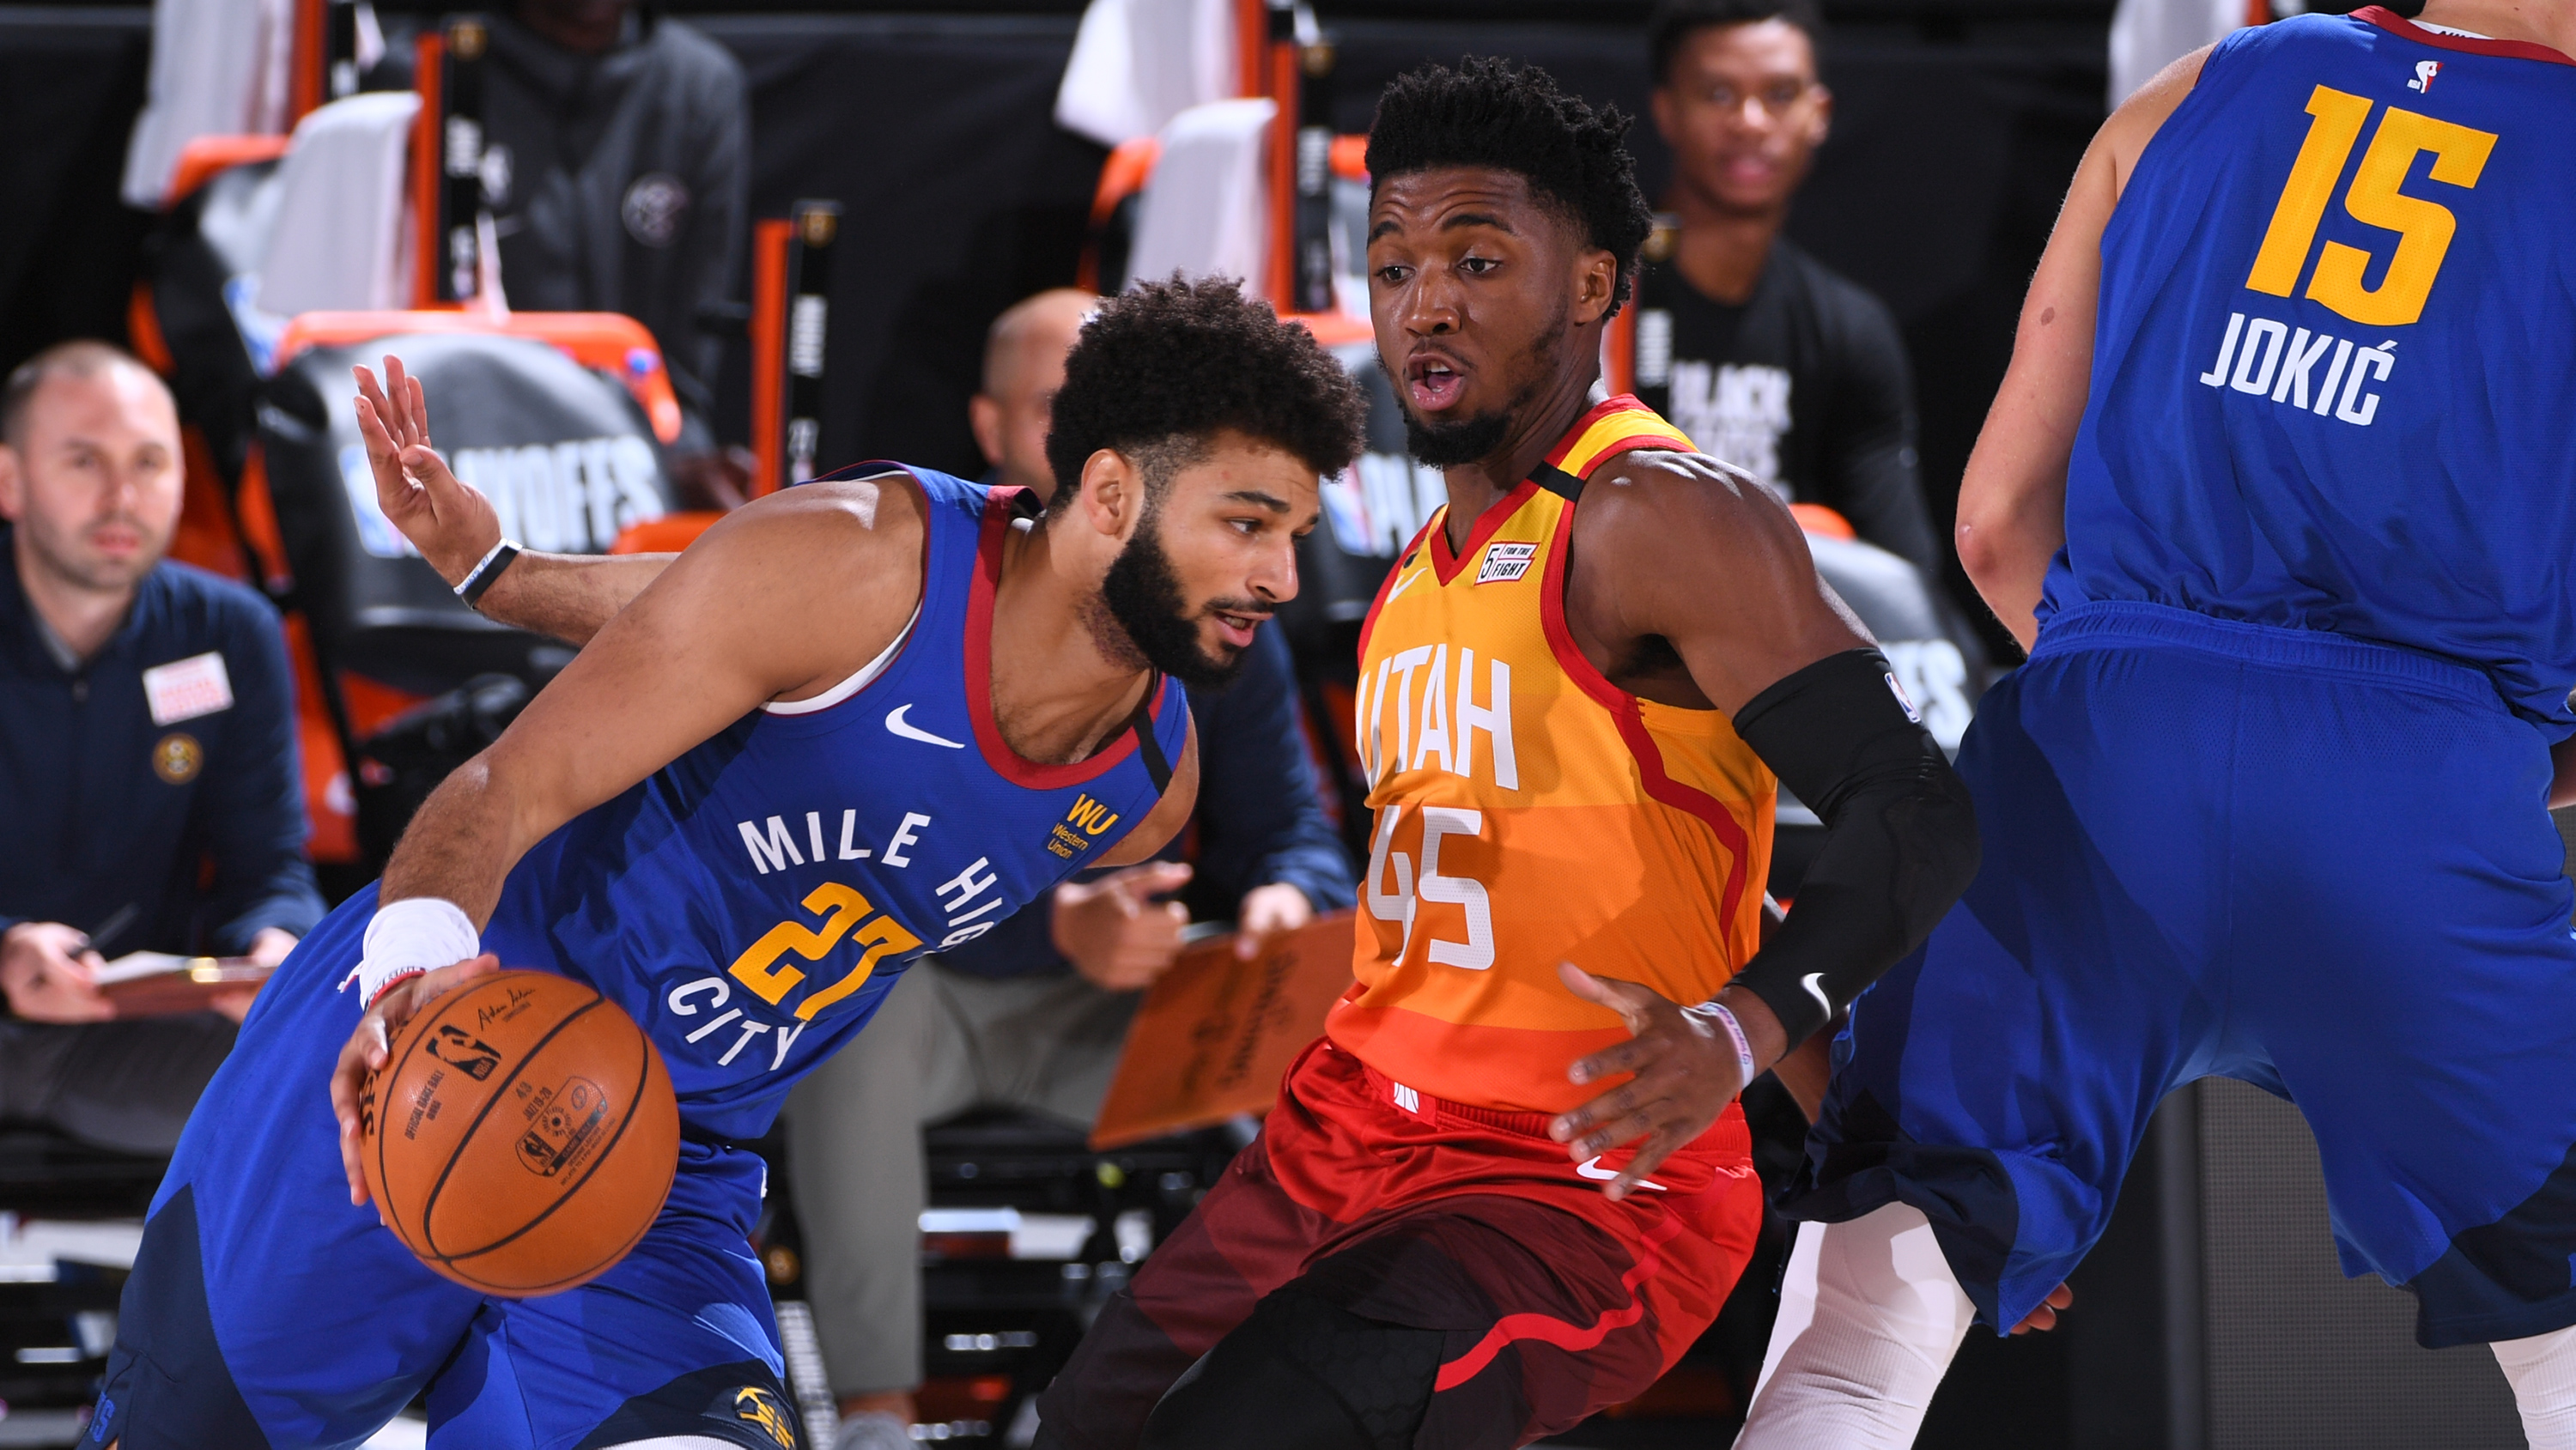

*Jamal Murray (left) and Donovan Mitchell (right) facing off.*

A look at the NBA playoff battle between the Denver Nuggets and the Utah Jazz will have you wowed by the absolute masterclass of scoring ability, and the will to win shown by both teams over the course of 7 games. 

But the spotlight was definitely on two players; Donavan Mitchell of the Utah Jazz and Jamal Murray of the Denver Nuggets, both players played to record breaking heights, setting an All Time High for points scored by opposing players in a playoff series, among other records, with their efforts. 
Although the series finished in favour of the Denver Nuggets, Mitchell still tops the Points per Game playoff leaderboard.

While their achievements are worthy to be noted, what gives it that extra sparkle is that this was not a battle between legendary giants like Lebron or Harden but relatively younger players new to the NBA (*Donovan is 24 with 3 seasons under his belt and Jamal is 23 with 4 seasons*).

This leaves all NBA fans wondering Is it Time? Are we seeing a New Wave of NBA superstars coming into their dominant positions?

## Data Preparation


---



---



In order to investigate player performance in the NBA, we need data on player statistics. This analysis is exclusively made from data scrapped from the [Basketball Reference](https://www.basketball-reference.com/) website. 

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

# Scraping data from NBA stats website
url = 'https://www.basketball-reference.com/leagues/NBA_2020_totals.html'
html = urlopen(url)
soup = BeautifulSoup(html)

# The data we need is enclosed in HTML tables
col_headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
col_headers = col_headers[1:] # The rank column is not needed

# Skipping the first table row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

stats = pd.DataFrame(player_stats, columns = col_headers)
stats.head(10)

Player Pos Age   Tm   G  GS  ...  AST STL BLK  TOV   PF   PTS
0              Steven Adams   C  26  OKC  63  63  ...  146  51  67   94  122   684
1               Bam Adebayo  PF  22  MIA  72  72  ...  368  82  93  204  182  1146
2         LaMarcus Aldridge   C  34  SAS  53  53  ...  129  36  87   74  128  1001
3            Kyle Alexander  PF  23  MIA   2   0  ...    0   0   0    1    1     2
4  Nickeil Alexander-Walker  SG  21  NOP  47   1  ...   89  17   8   54   57   267
5             Grayson Allen  SG  24  MEM  38   0  ...   52  10   2   33   53   330
6             Jarrett Allen   C  21  BRK  70  64  ...  110  40  92   77  162   775
7              Kadeem Allen  SG  27  NYK  10   0  ...   21   5   2    8    7    50
8           Al-Farouq Aminu  PF  29  ORL  18   2  ...   21  18   8   17   27    78
9           Justin Anderson  SF  26  BRK  10   1  ...    8   0   6    4   13    28

[10 rows x 29 columns]

**Glossary**
 - Pos -- Position
 - Age -- Player's age on February 1 of the season
 - Tm -- Team
 - G -- Games
 - GS -- Games Started
 - MP -- Minutes Played
 - FG -- Field Goals
 - FGA -- Field Goal Attempts 
 - FG% -- Field Goal Percentage
 - 3P -- 3-Point Field Goals 
 - 3PA -- 3-Point Field Goal Attempts 
 - 3P% -- 3-Point Field Goal Percentage
 - 2P -- 2-Point Field Goals 
 - 2PA -- 2-Point Field Goal Attempts 
 - 2P% -- 2-Point Field Goal Percentage
 - eFG% -- Effective Field Goal Percentage
This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
 - FT -- Free Throws 
 - FTA -- Free Throw Attempts 
 - FT% -- Free Throw Percentage
 - ORB -- Offensive Rebounds 
 - DRB -- Defensive Rebounds 
 - TRB -- Total Rebounds 
 - AST -- Assists 
 - STL -- Steals 
 - BLK -- Blocks 
 - TOV -- Turnovers 
 - PF -- Personal Fouls 
 - PTS -- Points 

The statistics above are traditional statistics tracked during basketball games. However, over the years, more optimized or 'advanced' statistics have been added to further analyse elements of a player's game.

In [2]:
# Scrapping Advanced stats
url1 = "https://www.basketball-reference.com/leagues/NBA_2020_advanced.html"
html1 = urlopen(url1)
soup1 = BeautifulSoup(html1)

col_headers1 = [th.getText() for th in soup1.findAll('tr', limit=2)[0].findAll('th')]
col_headers1 = col_headers1[1:]

rows1 = soup1.findAll('tr')[1:]
player_stats1 = [[td.getText() for td in rows1[i].findAll('td')] for i in range(len(rows1))]

advan_stats = pd.DataFrame(player_stats1, columns = col_headers1)
advan_stats.head(10)

Player Pos Age   Tm   G  ...    OBPM  DBPM   BPM  VORP
0              Steven Adams   C  26  OKC  63  ...     1.9   1.1   2.9   2.1
1               Bam Adebayo  PF  22  MIA  72  ...     1.4   2.0   3.4   3.3
2         LaMarcus Aldridge   C  34  SAS  53  ...     1.8  -0.5   1.4   1.5
3            Kyle Alexander  PF  23  MIA   2  ...    -6.1  -3.5  -9.6   0.0
4  Nickeil Alexander-Walker  SG  21  NOP  47  ...    -3.2  -1.4  -4.6  -0.4
5             Grayson Allen  SG  24  MEM  38  ...    -0.1  -1.2  -1.3   0.1
6             Jarrett Allen   C  21  BRK  70  ...     1.4   1.0   2.3   2.0
7              Kadeem Allen  SG  27  NYK  10  ...    -0.1  -0.6  -0.7   0.0
8           Al-Farouq Aminu  PF  29  ORL  18  ...    -4.4   1.4  -3.0  -0.1
9           Justin Anderson  SF  26  BRK  10  ...    -6.8  -0.9  -7.7  -0.2

[10 rows x 28 columns]

**Glossary**
 - Pos -- Position
 - Age -- Player's age on February 1 of the season
 - Tm -- Team
 - G -- Games
 - MP -- Minutes Played
 - PER -- Player Efficiency Rating.
A measure of per-minute production standardized such that the league average is 15.
 - TS% -- True Shooting Percentage.
A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.
 - 3PAr -- 3-Point Attempt Rate.
Percentage of FG Attempts from 3-Point Range
 - FTr -- Free Throw Attempt Rate.
Number of FT Attempts Per FG Attempt
 - ORB% -- Offensive Rebound Percentage.
An estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.
 - DRB% -- Defensive Rebound Percentage.
An estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.
 - TRB% -- Total Rebound Percentage.
An estimate of the percentage of available rebounds a player grabbed while he was on the floor.
 - AST% -- Assist Percentage.
An estimate of the percentage of teammate field goals a player assisted while he was on the floor.
 - STL% -- Steal Percentage.
An estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
 - BLK% -- Block Percentage.
An estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.
 - TOV% -- Turnover Percentage.
An estimate of turnovers committed per 100 plays.
 - USG% -- Usage Percentage.
An estimate of the percentage of team plays used by a player while he was on the floor.
 - OWS -- Offensive Win Shares.
An estimate of the number of wins contributed by a player due to his offense.
 - DWS -- Defensive Win Shares.
An estimate of the number of wins contributed by a player due to his defense.
 - WS -- Win Shares.
An estimate of the number of wins contributed by a player.
 - WS/48 -- Win Shares Per 48 Minutes.
An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)
 - OBPM -- Offensive Box Plus/Minus.
A box score estimate of the offensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
 - DBPM -- Defensive Box Plus/Minus.
A box score estimate of the defensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
 - BPM -- Box Plus/Minus.
A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team.
 - VORP -- Value over Replacement Player.
A box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season.
Multiply by 2.70 to convert to wins over replacement.


In [3]:
# Changing the relevant columns from dataframe objects to float
cols=[i for i in stats.columns if i not in ["Player","Pos","Tm"]]
for col in cols:
    stats[col] = pd.to_numeric(stats[col], errors='coerce')

In [4]:
cols=[i for i in advan_stats.columns if i not in ["Player","Pos","Tm"]]
for col in cols:
    advan_stats[col] = advan_stats[col].apply(pd.to_numeric, errors='coerce')  

advan_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  651 non-null    object 
 1   Pos     651 non-null    object 
 2   Age     651 non-null    float64
 3   Tm      651 non-null    object 
 4   G       651 non-null    float64
 5   MP      651 non-null    float64
 6   PER     651 non-null    float64
 7   TS%     649 non-null    float64
 8   3PAr    649 non-null    float64
 9   FTr     649 non-null    float64
 10  ORB%    651 non-null    float64
 11  DRB%    651 non-null    float64
 12  TRB%    651 non-null    float64
 13  AST%    651 non-null    float64
 14  STL%    651 non-null    float64
 15  BLK%    651 non-null    float64
 16  TOV%    649 non-null    float64
 17  USG%    651 non-null    float64
 18          0 non-null      float64
 19  OWS     651 non-null    float64
 20  DWS     651 non-null    float64
 21  WS      651 non-null    float64
 22  WS

In [5]:
# Drop null columns that show up from the website
advan_stats.dropna(how='all', axis=1, inplace=True)

In [6]:
merged_stats = stats.merge(advan_stats, how='left', on=['Player','Pos','Age','Tm','G','MP'])
merged_stats.head()

Player Pos   Age   Tm     G  ...  WS/48  OBPM  DBPM  BPM  VORP
0              Steven Adams   C  26.0  OKC  63.0  ...  0.185   1.9   1.1  2.9   2.1
1               Bam Adebayo  PF  22.0  MIA  72.0  ...  0.168   1.4   2.0  3.4   3.3
2         LaMarcus Aldridge   C  34.0  SAS  53.0  ...  0.122   1.8  -0.5  1.4   1.5
3            Kyle Alexander  PF  23.0  MIA   2.0  ... -0.003  -6.1  -3.5 -9.6   0.0
4  Nickeil Alexander-Walker  SG  21.0  NOP  47.0  ... -0.020  -3.2  -1.4 -4.6  -0.4

[5 rows x 49 columns]

In [7]:
merged_stats.dropna(how='all', axis=0, inplace=True)
merged_stats = merged_stats[merged_stats['MP'] > 96] # Restricting the dataset to players that have played at least two full games
merged_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 1326
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  545 non-null    object 
 1   Pos     545 non-null    object 
 2   Age     545 non-null    float64
 3   Tm      545 non-null    object 
 4   G       545 non-null    float64
 5   GS      545 non-null    float64
 6   MP      545 non-null    float64
 7   FG      545 non-null    float64
 8   FGA     545 non-null    float64
 9   FG%     545 non-null    float64
 10  3P      545 non-null    float64
 11  3PA     545 non-null    float64
 12  3P%     531 non-null    float64
 13  2P      545 non-null    float64
 14  2PA     545 non-null    float64
 15  2P%     545 non-null    float64
 16  eFG%    545 non-null    float64
 17  FT      545 non-null    float64
 18  FTA     545 non-null    float64
 19  FT%     544 non-null    float64
 20  ORB     545 non-null    float64
 21  DRB     545 non-null    float64
 22  T

In [8]:
# Cleaning the Position categories
merged_stats['Pos'] = merged_stats['Pos'].replace(["C-PF"], 'C')
merged_stats['Pos'] = merged_stats['Pos'].replace(["PF-C"], 'PF')
merged_stats['Pos'] = merged_stats['Pos'].replace(["SF-PF"], 'SF')
merged_stats['Pos'] = merged_stats['Pos'].replace(["SF-SG"], 'SF')
merged_stats['Pos'].value_counts()

SG    137
PF    108
SF    102
C     102
PG     96
Name: Pos, dtype: int64

In [9]:
# Categorizing players based on Age
for index, row in merged_stats.iterrows():
  if merged_stats.loc[index,'Age'] <= 25:
    merged_stats.loc[index, 'Age_Category'] = '25 and below'
  else:
    merged_stats.loc[index, 'Age_Category'] = 'Over 25'

merged_stats.head()

Player Pos   Age   Tm  ...  DBPM  BPM  VORP  Age_Category
0              Steven Adams   C  26.0  OKC  ...   1.1  2.9   2.1       Over 25
1               Bam Adebayo  PF  22.0  MIA  ...   2.0  3.4   3.3  25 and below
2         LaMarcus Aldridge   C  34.0  SAS  ...  -0.5  1.4   1.5       Over 25
4  Nickeil Alexander-Walker  SG  21.0  NOP  ...  -1.4 -4.6  -0.4  25 and below
5             Grayson Allen  SG  24.0  MEM  ...  -1.2 -1.3   0.1  25 and below

[5 rows x 50 columns]

In [10]:
merged_stats['Age_Category'].value_counts()

Over 25         282
25 and below    263
Name: Age_Category, dtype: int64

It is important to note that there are more players over 25 in our dataset.

## Data Analysis


---



---



Over the course of this report, we will look through player performances and the statistics associated with them in order to evaluate the 'success' of young players in the NBA; denoted here as players aged twenty-five (25) or younger. We would also compare the performances of these players with that of their older colleagues.

*Performance statistics will be exclusively on the recently-concluded 2019-2020 regular season.*

### Stat Analysis


---



---



In our analysis, we will focus on four (4) critical player statistics that will help reveal dominant players;
 - PTS (*Points Scored*): No matter the role or position a player fills for his NBA team, the ability to put up points against opponents will always be valued.
 - PER (*Player Efficiency Rating*): This statistic measures a player's per minute productivity by putting a player's positive contributions against their negative contributions [PER](bleach-report).
 - WS (*Win Shares*): Another measure of contribution, this one focuses on the player's contribution to the team's win total (i.e. overall success) [WS](bleach-report).
 -VORP (*Value Over Replacement Player*): This statistic is an estimate of a player's contribution to the team over a replacement player. It is a derivative of the BPM (Box Plus/Minus) [VORP](BR).

In [11]:
# Importing visualization packages and setting templates
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
style.use('fivethirtyeight')
sns.set_context("poster")
sns.color_palette("Paired")
# Importing plotting package
import plotly.express as px
import plotly.io as pio
pio.templates.default = "presentation"
from plotly.subplots import make_subplots
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Using these stats, we can compare the overall performances of the 'young' and 'old' players.

Text(0.5, 0, '')

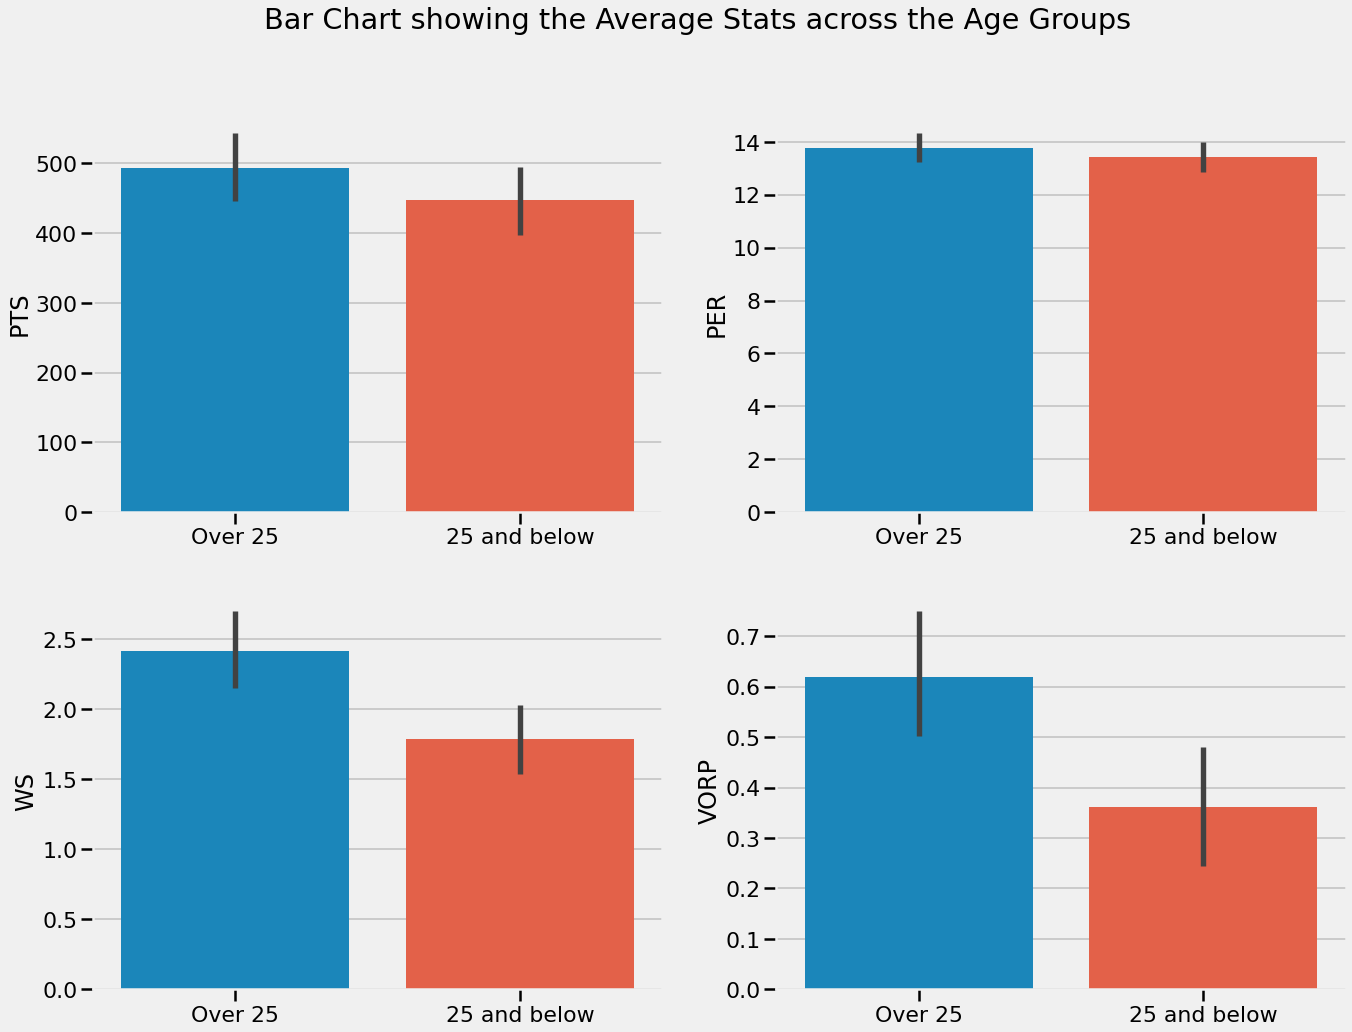

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('Bar Chart showing the Average Stats across the Age Groups')

sns.barplot(ax=axes[0, 0], data=merged_stats, x='Age_Category', y='PTS')
axes[0,0].set_xlabel('')
sns.barplot(ax=axes[0, 1], data=merged_stats, x='Age_Category', y='PER')
axes[0,1].set_xlabel('')
sns.barplot(ax=axes[1, 0], data=merged_stats, x='Age_Category', y='WS')
axes[1,0].set_xlabel('')
sns.barplot(ax=axes[1, 1], data=merged_stats, x='Age_Category', y='VORP')
axes[1,1].set_xlabel('')

The above visualization shows the average statistical performance by the old (Over 25) and young (25 and below). Comparing the age groups, we can see that on average our players over 25 outperform their younger counterparts across all statistics, only coming close on player efficiency rating (PER). 

However, this does not conclude our analysis as by definition, NBA superstars are deviations from the average. Hence, in order to find these young players that can dominate the court with or against veterans in the sport, we need to look at the outliers.

Text(0.5, 0, '')

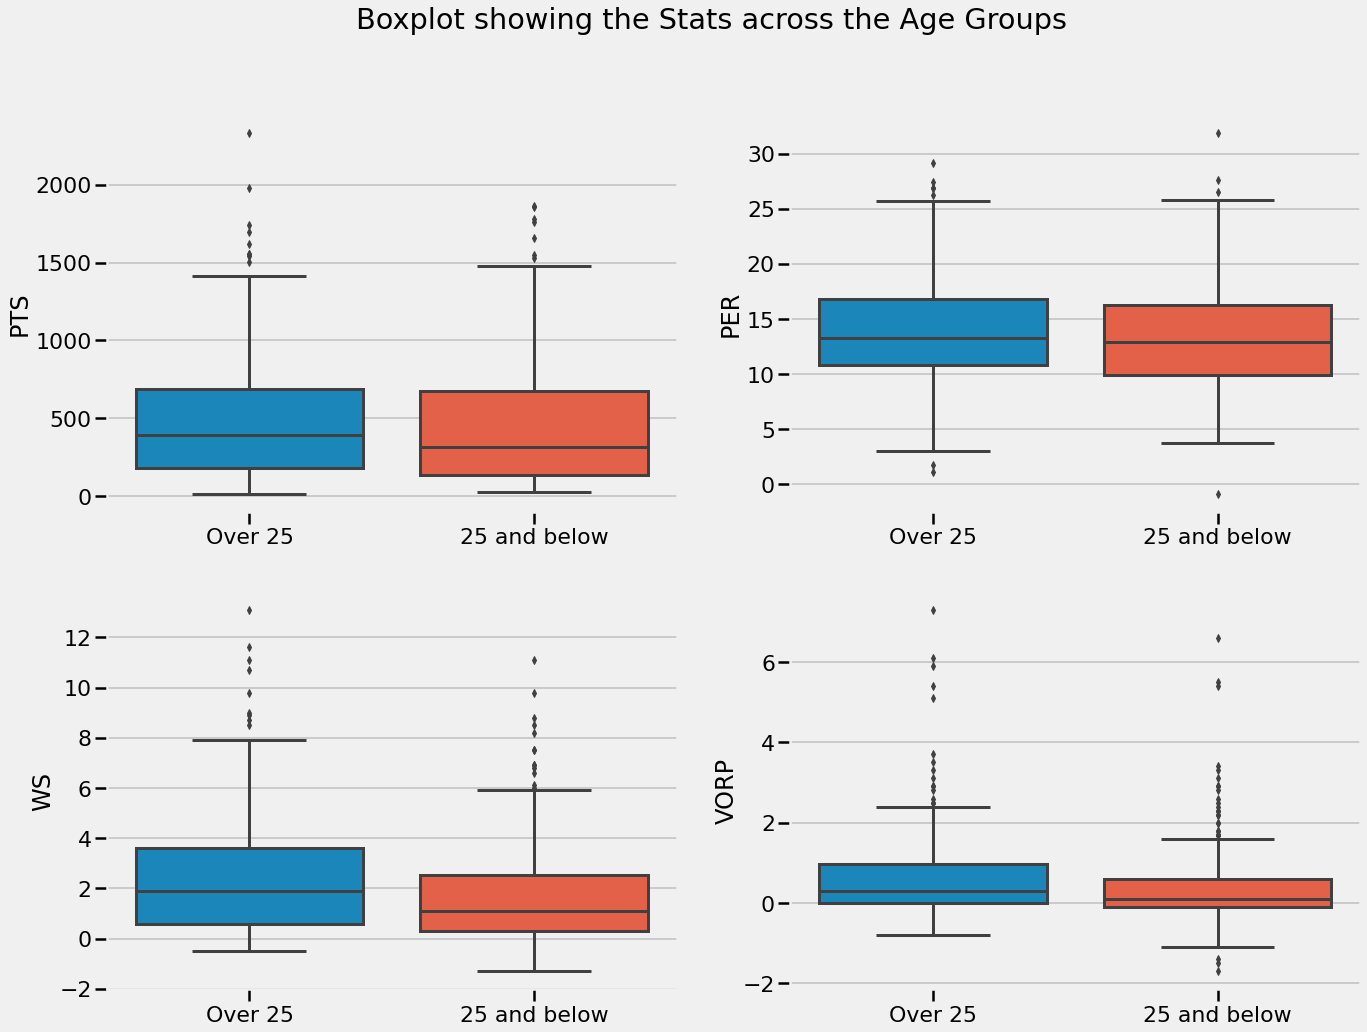

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('Boxplot showing the Stats across the Age Groups')

sns.boxplot(ax=axes[0, 0], data=merged_stats, x='Age_Category', y='PTS')
axes[0,0].set_xlabel('')
sns.boxplot(ax=axes[0, 1], data=merged_stats, x='Age_Category', y='PER')
axes[0,1].set_xlabel('')
sns.boxplot(ax=axes[1, 0], data=merged_stats, x='Age_Category', y='WS')
axes[1,0].set_xlabel('')
sns.boxplot(ax=axes[1, 1], data=merged_stats, x='Age_Category', y='VORP')
axes[1,1].set_xlabel('')

In this visualization, we can immediately see there are young players who are consistently competing on the leaderboards of these statistics. 

If any of these four statistics are used to rank the best players in the NBA, a player who is 25 or younger will always be in the top 5 for consideration.

Let's have a closer look at who these young players that top the NBA league, despite their age, are.

In [49]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("PTS","PER", "WS", "VORP"))

fig.add_trace(go.Box(x=merged_stats['Age_Category'], y=merged_stats['PTS'], text=merged_stats['Player']),
                 row=1, col=1)

fig.add_trace(go.Box(x=merged_stats['Age_Category'], y=merged_stats['PER'], text=merged_stats['Player']),
                 row=1, col=2)
fig.add_trace(go.Box(x=merged_stats['Age_Category'], y=merged_stats['WS'], text=merged_stats['Player']),
                 row=2, col=1)
fig.add_trace(go.Box(x=merged_stats['Age_Category'], y=merged_stats['VORP'], text=merged_stats['Player']),
                 row=2, col=2)
fig.update_layout(showlegend=False, title_text="Alternate Boxplot showing the Stats across the Age Groups", height=1000)
fig.show()

We have names like Giannis Antetokounmpo, Nikola Jokic, Luka Doncic, Jason Tatum, Trae Young and Devin Booker, all players under 26 who are outlier superstars by more than one stat rating. 

It is also important to note Giannis Antetokounmpo as he tops three (3) of the performance statistics in his age group and notably tops the player efficiency rating (PER) of the entire league, young or old. This makes him one of the best players in the league already at the age of 25 years.

In [15]:
print(merged_stats[merged_stats['Age_Category'] == '25 and below']['PTS'].mean())
print(merged_stats[merged_stats['Age_Category'] == 'Over 25']['PTS'].mean())

446.851711026616
493.6276595744681


In [16]:
print(merged_stats[merged_stats['Age_Category'] == '25 and below']['PER'].mean())
print(merged_stats[merged_stats['Age_Category'] == 'Over 25']['PER'].mean())

13.419391634980988
13.78510638297872


### Position Analysis


---



---



There can be particular roles or positions that can be said to be advantaged towards a particular age group due to the requirements of the role or position. Qualities like quickness, physicality, experience, intelligence are beneficial for any position but some positions or roles might need it more.

Next, we take a look at the stats for each NBA traditional position and see which players and age groups are dominant. 

  *Points Scored (PTS)*

Text(0.5, 0.98, 'Bar Chart of Average PTS by Age groups across positions')

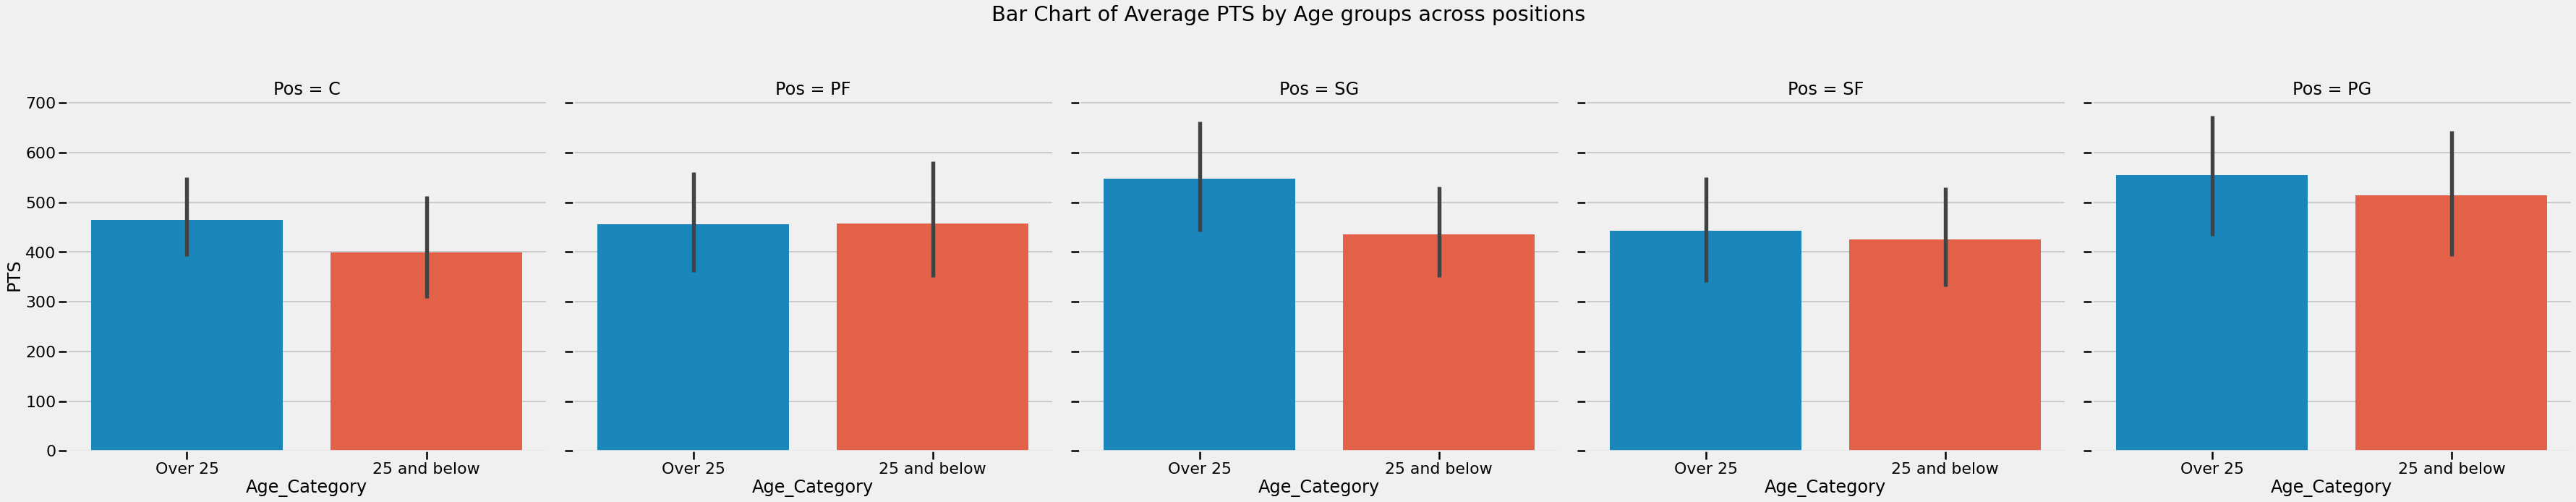

In [51]:
ax= sns.catplot(kind='bar',x='Age_Category', y='PTS',col='Pos', data=merged_stats, height=10)
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Bar Chart of Average PTS by Age groups across positions')

The above visualization shows averages, that is the average number of points scored by each age group across the various positions. 
When it comes to scoring, players over 25 are on average better than their younger colleagues across most positions. The power forward (PF) position looks approximately even from both age groups.

In order to investigate individual scores in each category and position, we take a look at the boxplot.

Text(0.5, 0.98, 'Box Chart of PTS by Age groups across positions')

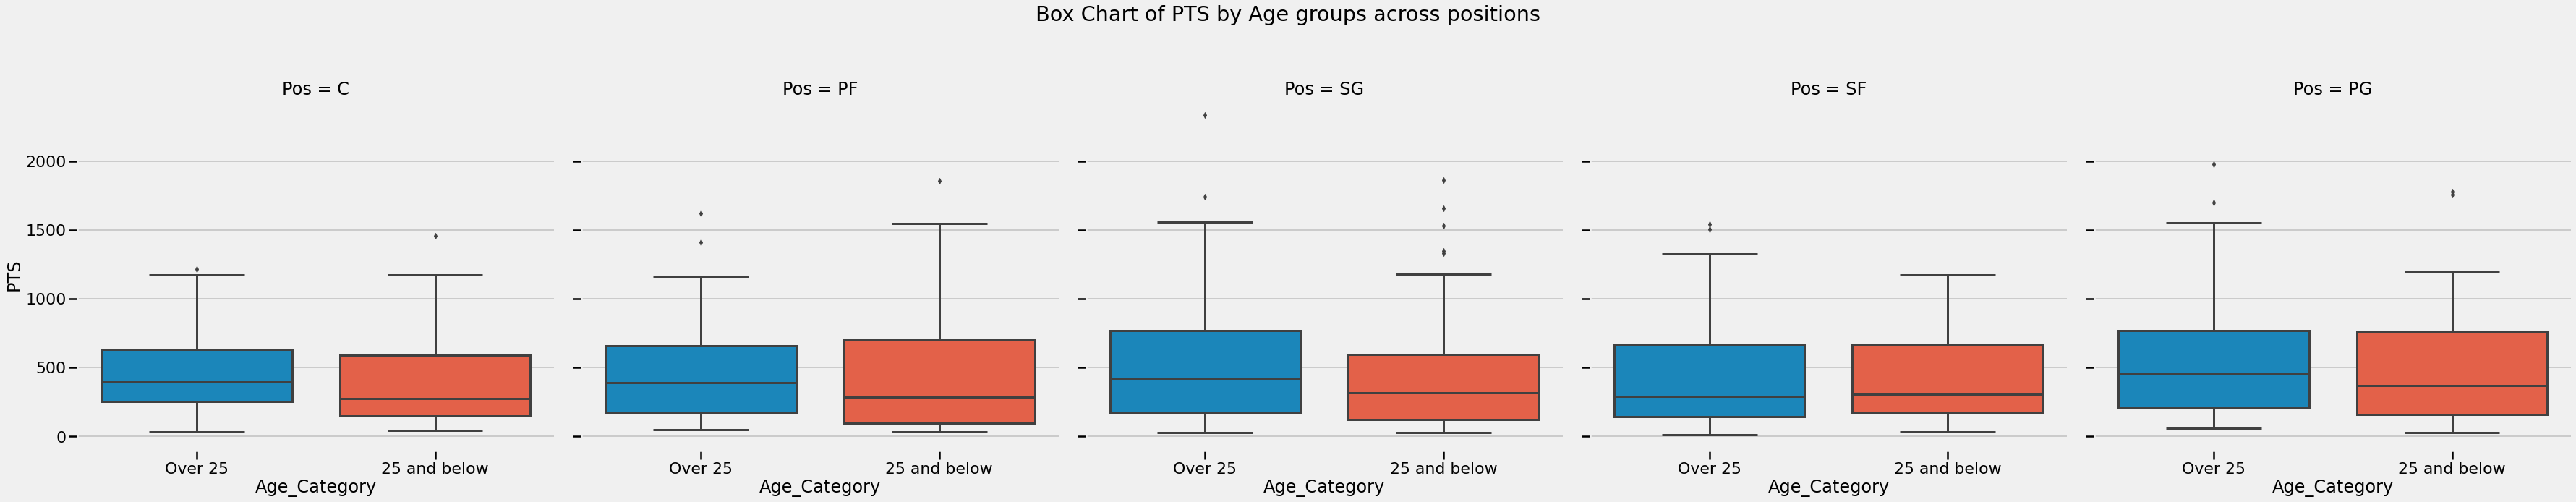

In [53]:
ax= sns.catplot(kind='box',x='Age_Category', y='PTS',col='Pos', data=merged_stats, height=10)
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Box Chart of PTS by Age groups across positions')

From the above boxplot, we can see that the center and power forward position have more young high scorers, even though the '25 and below' age group loses out on average.  

In [54]:
fig = px.box(merged_stats, x="Age_Category", y="PTS", color='Pos', hover_name='Player', title='Alternate Box Plot of PTS by Age across positions', height=1000)
fig.show()

In this visualization, we see that Nikola Jokic and Giannis Antetokounmpo, both 25 years old, top the league in scoring for the center and power forward positions respectively. 

While the small forward position has no young superstar outliers in terms of scoring, names like Devin Booker, Donovan Mitchell (SG), Trae Young, Luka Doncic are proof of the scoring potential in the young players of the shooting guard and point guard positions



  *Player Efficiency Rating (PER)*

Text(0.5, 0.98, 'Bar Chart of Average PER by Age groups across positions')

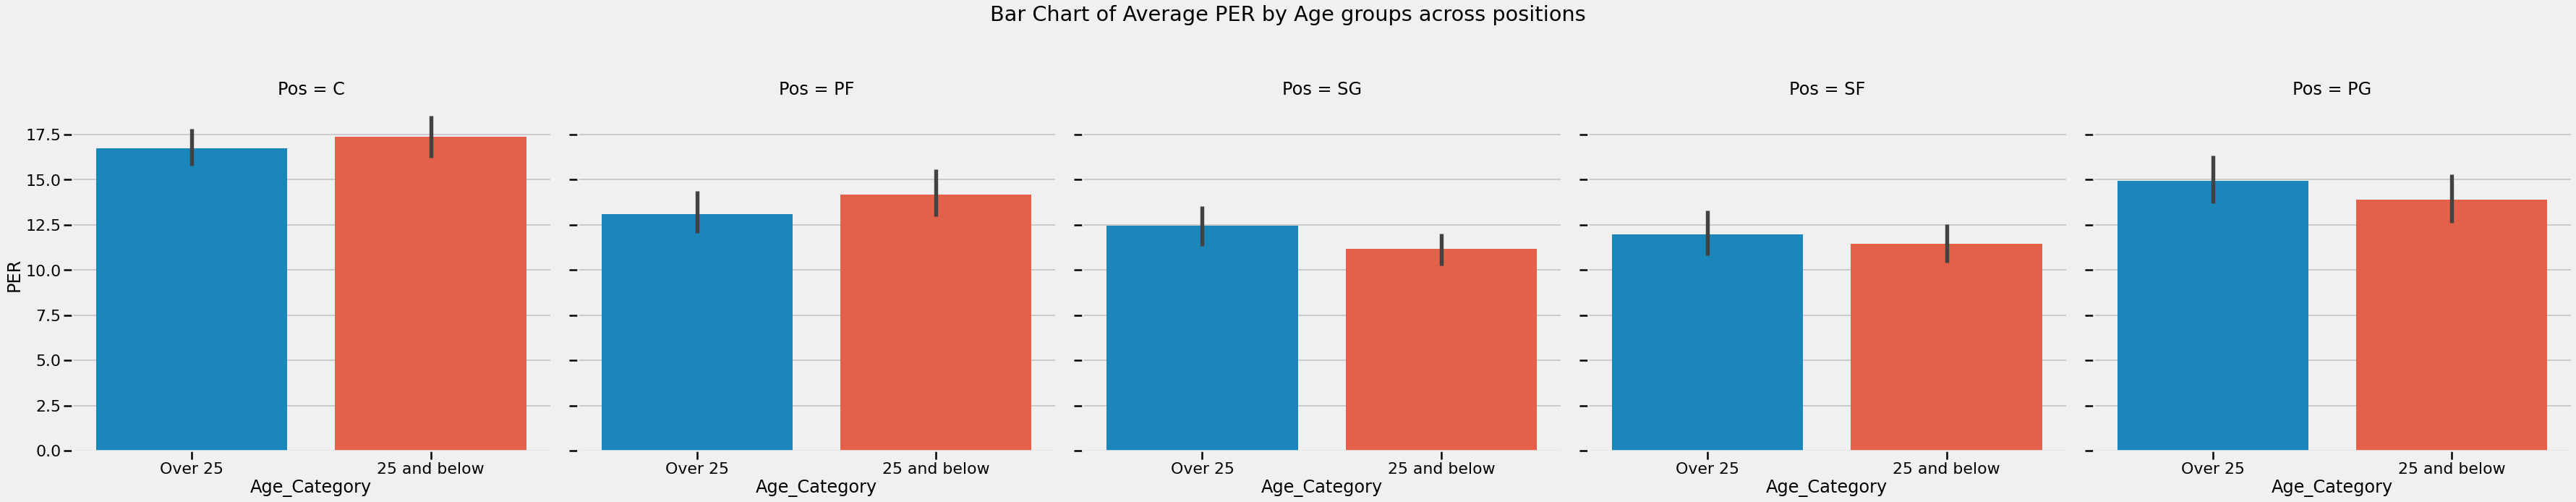

In [20]:
ax= sns.catplot(kind='bar',x='Age_Category', y='PER',col='Pos', data=merged_stats, height=10)
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Bar Chart of Average PER by Age groups across positions')

When it comes to the player efficiency rating (PER), young players on average edge out their older colleagues in the center and power forward positions. While the performance of the shooting guard, small forward and point guard positions are more in favour of the older players.

Text(0.5, 0.98, 'Box Chart of PER by Age groups across positions')

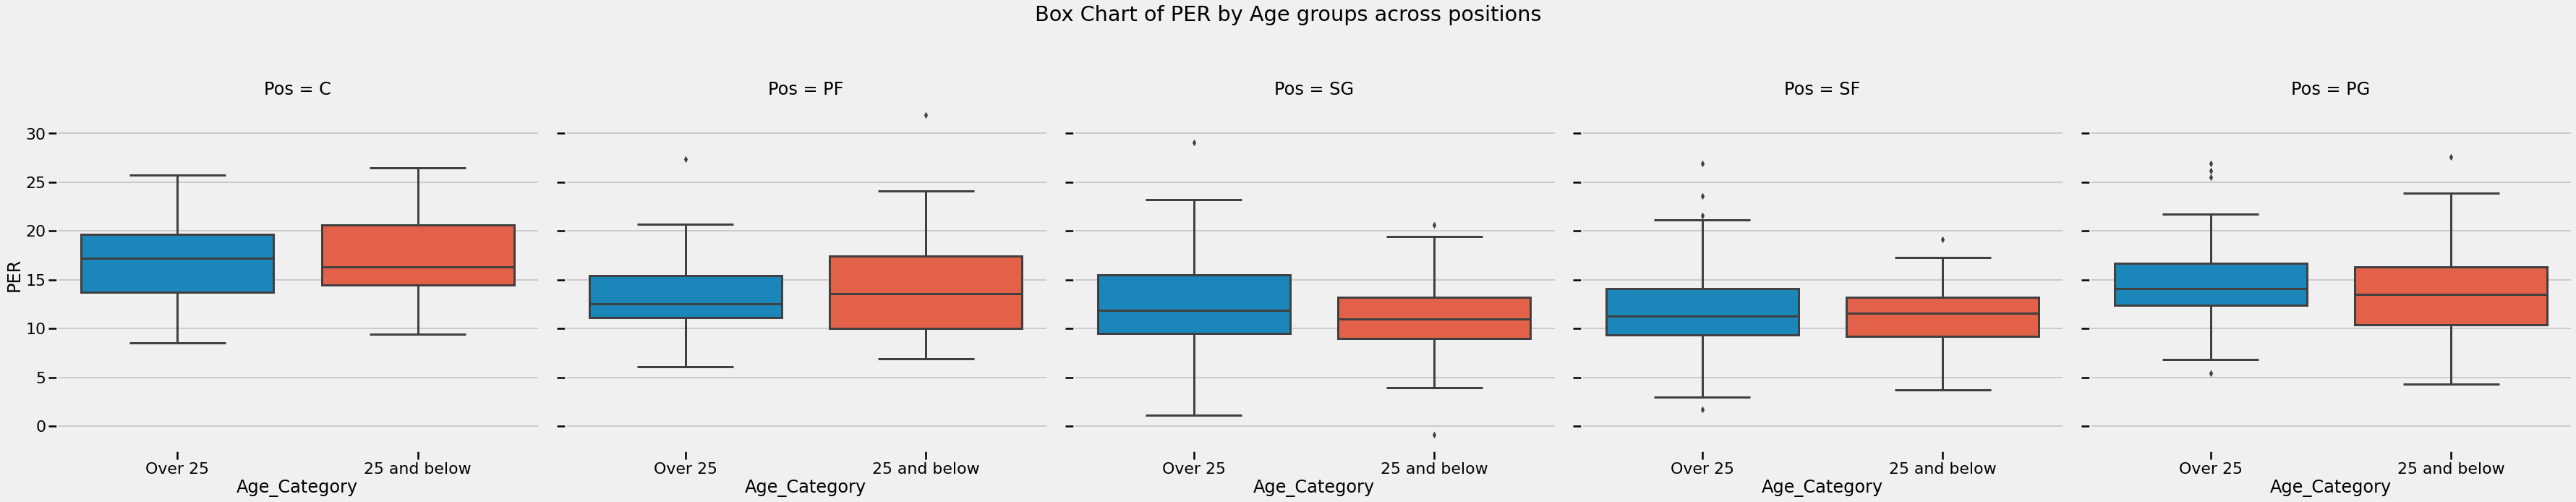

In [21]:
ax= sns.catplot(kind='box',x='Age_Category', y='PER',col='Pos', data=merged_stats, height=10)
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Box Chart of PER by Age groups across positions')

In [55]:
fig = px.box(merged_stats, x="Age_Category", y="PER", color='Pos', hover_name='Player', title='Alternate Box Plot of PER by Age across positions', height=1000)
fig.show()

Giannis is the league leader in PER (Player efficiency rating) so he obviously tops the power forward position in this statistic. 

But we have another young player topping the point guard position, which had older players dominating on average, Luka Doncic beats an older Damian Lillard to the top of the PG position showing how effective he was in his contributions to his team.

  *Win Shares (WS)*

Text(0.5, 0.98, 'Bar Chart of Average WS by Age groups across positions')

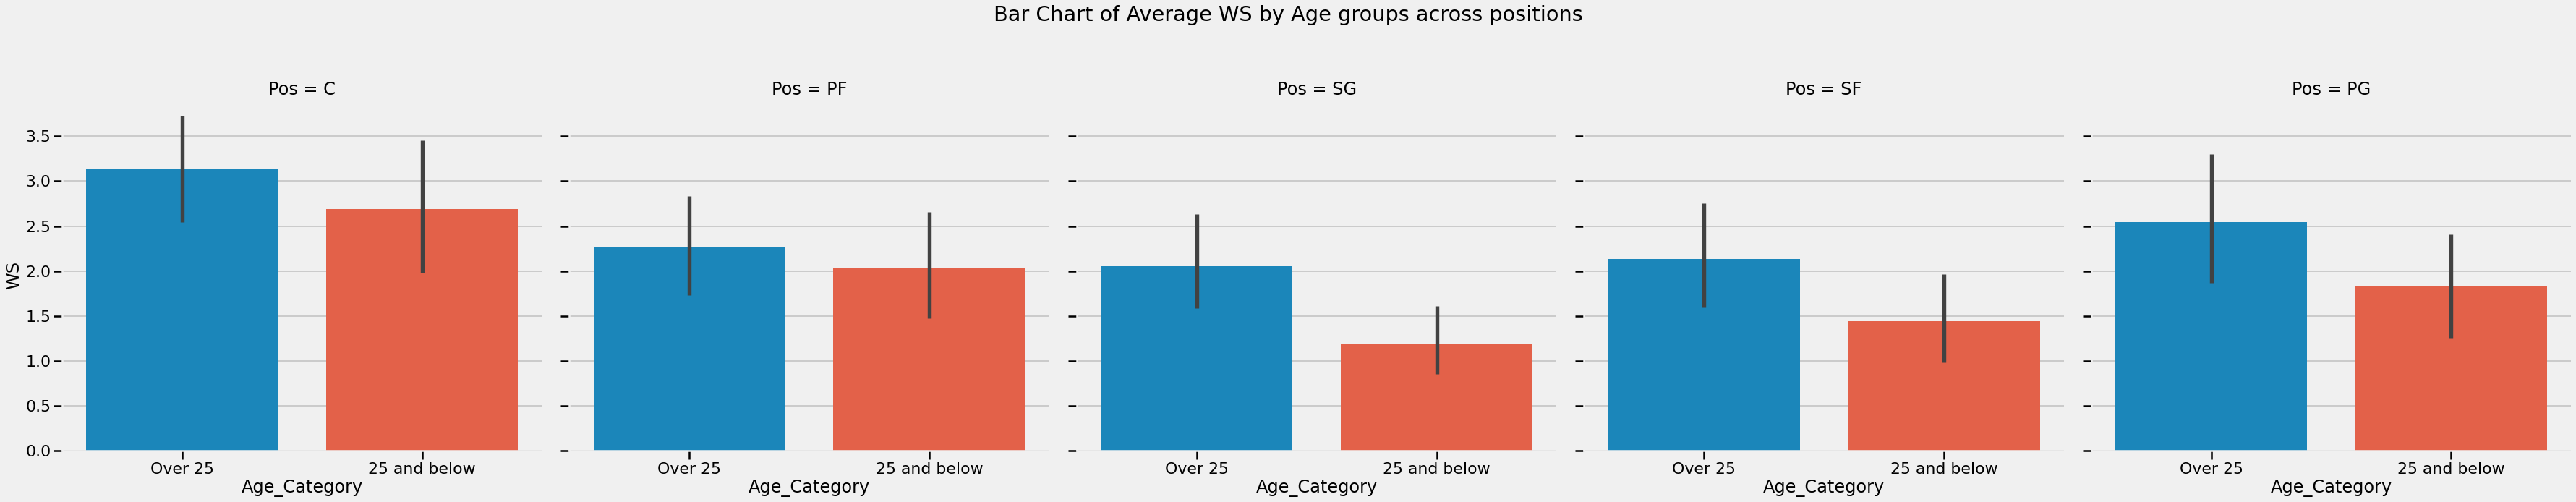

In [23]:
ax= sns.catplot(kind='bar',x='Age_Category', y='WS',col='Pos', data=merged_stats, height=10)
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Bar Chart of Average WS by Age groups across positions')

In terms of win shares, older players are on average dominant in all positions

Text(0.5, 0.98, 'Box Chart of WS by Age groups across positions')

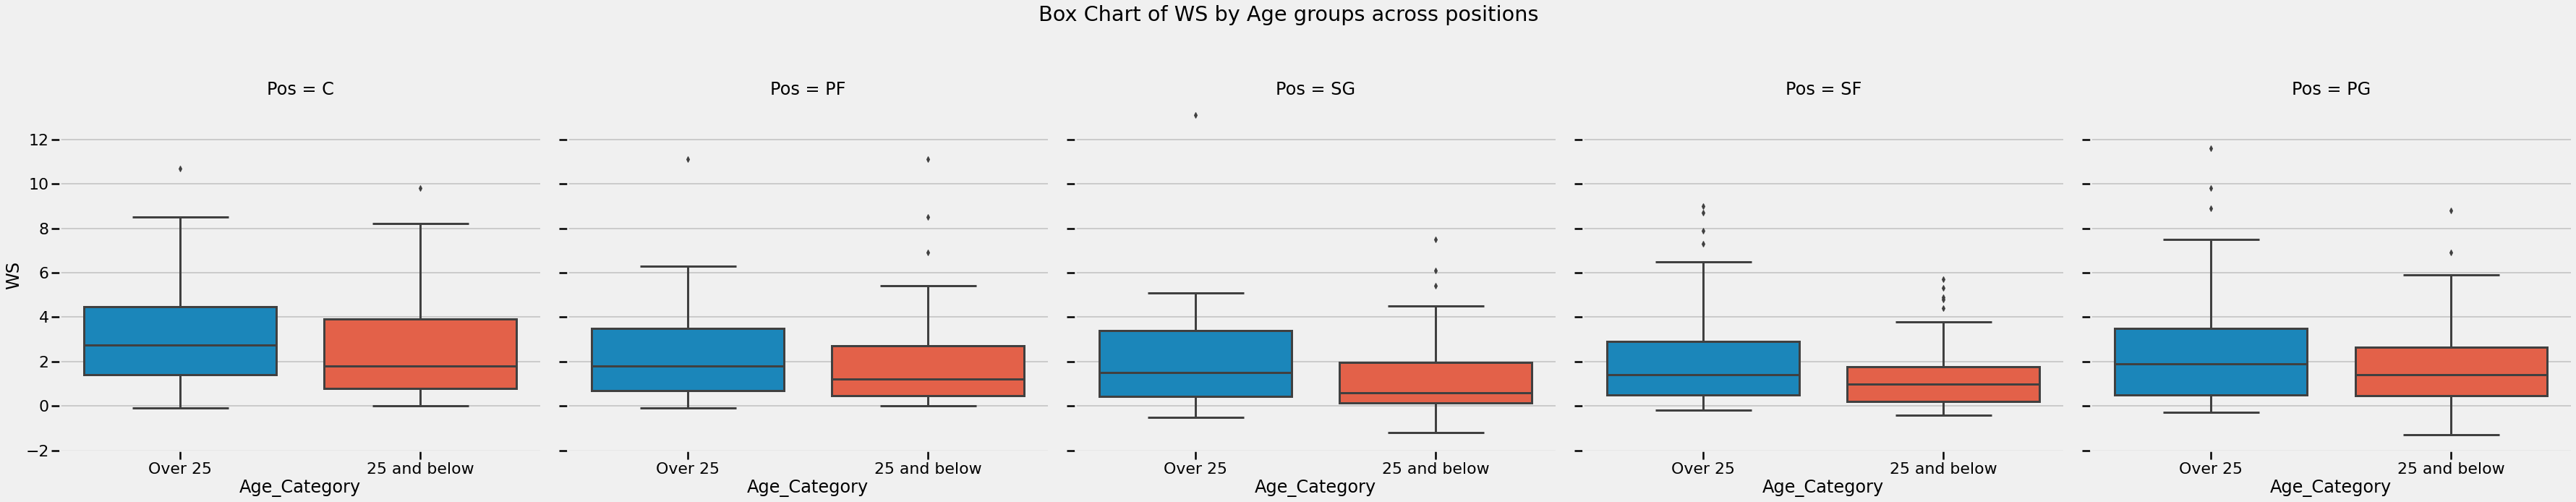

In [24]:
ax= sns.catplot(kind='box',x='Age_Category', y='WS',col='Pos', data=merged_stats, height=10)
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Box Chart of WS by Age groups across positions')

In [56]:
fig = px.box(merged_stats, x="Age_Category", y="WS", color='Pos', hover_name='Player', title='Alternate Box Plot of WS by Age across positions', height=1000)
fig.show()

Giannis ties with the older Anthony Davis for the top spot in win shares for power forwards. While Nikola Jokic, Luka Doncic, Devin Booker and Bam Adebayo do well for their respective position leaderboards.

  *Value over Replacement Player (VORP)*

Text(0.5, 0.98, 'Bar Chart of Average VORP by Age groups across positions')

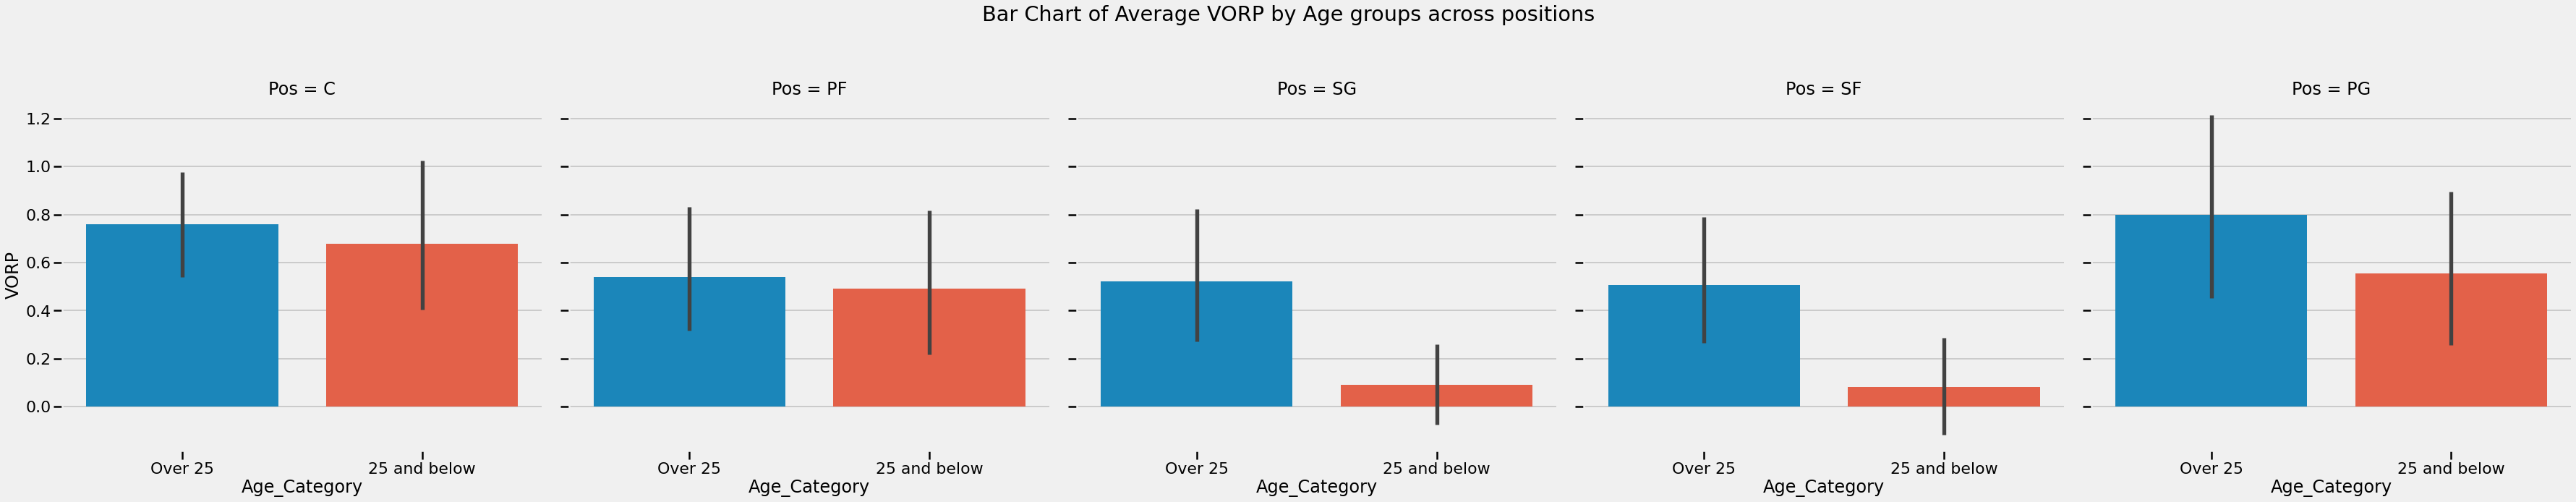

In [26]:
ax= sns.catplot(kind='bar',x='Age_Category', y='VORP',col='Pos', data=merged_stats, height=10)
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Bar Chart of Average VORP by Age groups across positions')

Again, we see that on average the older players outperform their younger counterparts. In this case, older players are on average more valuable than their theoretical replacement during the course of the NBA season. 

Text(0.5, 0.98, 'Box Chart of VORP by Age groups across positions')

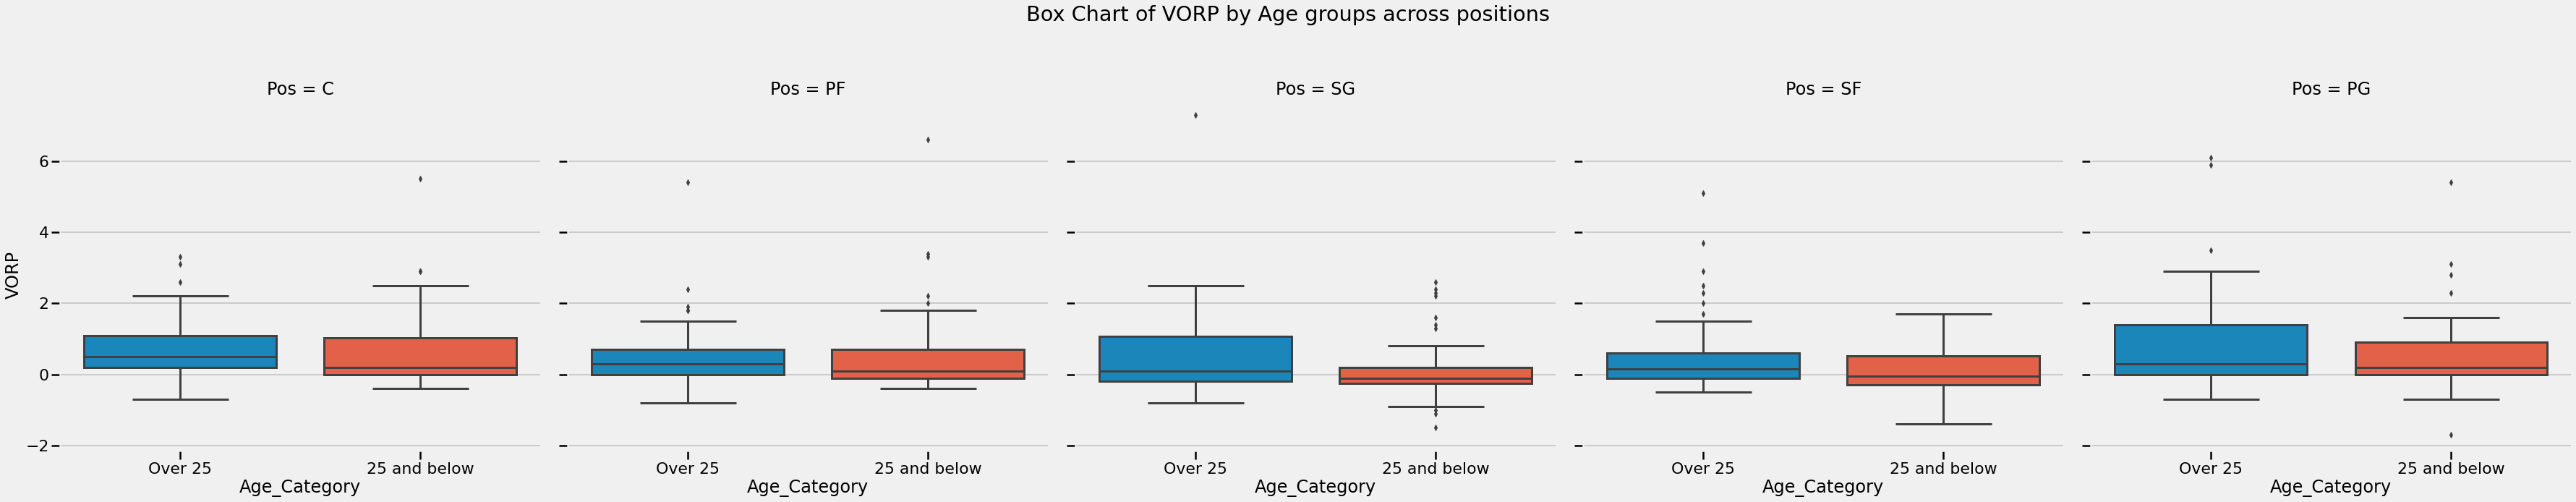

In [27]:
ax= sns.catplot(kind='box',x='Age_Category', y='VORP',col='Pos', data=merged_stats, height=10)
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Box Chart of VORP by Age groups across positions')

In [57]:
fig = px.box(merged_stats, x="Age_Category", y="VORP", color='Pos', hover_name='Player', title='Alternate Box Plot of VORP by Age across positions', height=1000)
fig.show()

The center and power forward position again have young players topping the statistic (VORP in this case) for their respective positions. 

Nikola Jokic, Giannis Antetokounmpo and Luka Doncic are three young players who have been consistently rated highly over their fellows, whether young or old. With Luka Doncic being a shocking 21 years with only 2 NBA seasons experience, the center, power forward and point guard roles have a young player (less than 26 years) leading their position statistics.

Looking at the other positions, there are a good number of excellent young shooting guards, like Devin Booker and Donovan Mitchell, but the top role is currently being dominated by an older James Harden who is an outlier to rival all other outliers across most stats as a shooting guard.

The small forward position is a curiosity with no young player claiming the significant outlier superstar status this season, leaving the role to be dominated by older players like Kawhi Leonard and Jimmy Butler.

### Team Analysis


---



---



Moving away from individual statistics, let's take a look at the young teams in the NBA (Mean age less than 26) and see how they are performing against other teams with more veterans or old players.

In [29]:
check= merged_stats.groupby(['Tm'], as_index=False)['Age'].mean().sort_values(by='Age')
round(check)

Tm   Age
9   GSW  24.0
3   CHI  24.0
1   BOS  25.0
23  PHO  25.0
14  MEM  25.0
18  NOP  25.0
17  MIN  25.0
20  OKC  25.0
4   CHO  25.0
11  IND  25.0
19  NYK  25.0
30  WAS  25.0
7   DEN  25.0
5   CLE  26.0
0   ATL  26.0
24  POR  26.0
2   BRK  26.0
27  TOR  26.0
21  ORL  26.0
25  SAC  26.0
8   DET  26.0
29  UTA  26.0
22  PHI  26.0
12  LAC  27.0
26  SAS  27.0
15  MIA  27.0
28  TOT  27.0
6   DAL  27.0
10  HOU  29.0
16  MIL  29.0
13  LAL  29.0

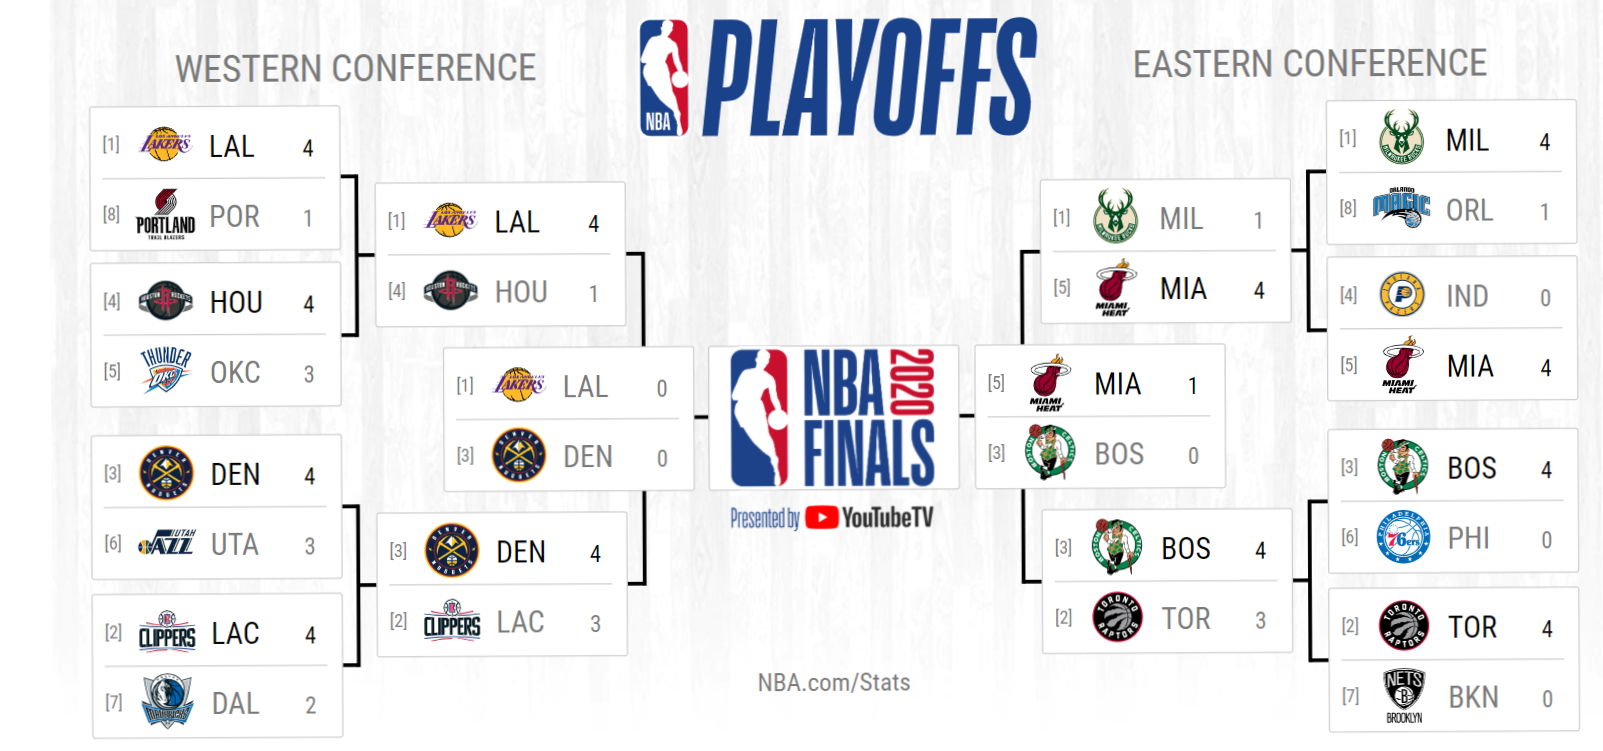

*The numbers in square brackets represent their conference standings in the regular season*

In [30]:
young_tms = ['GSW','CHI','BOS','PHO','MEM','NOP','MIN','OKC','CHO','IND','NYK','WAS','DEN'] # Average age of 25 and below
playoff_tms = ['LAL', 'POR', 'HOU', 'OKC','DEN','UTA','LAC','DAL','MIL','MIA','ORL','IND','BOS','PHI','TOR','BKN'] 
young_playoff_tms = []
for i in check['Tm']:
  if (i in playoff_tms) & (i in young_tms):
    young_playoff_tms.append(i)

In [31]:
young_playoff_tms

['BOS', 'OKC', 'IND', 'DEN']

There you have it, out of 16 teams in the NBA playoffs, four (4) are young teams with a mean age less than 26 (Boston Celtics, Oklahoma City Thunder, Indiana Pacers and Denver Nuggets). Based on NBA rules, this means that only four (4) young teams finished within the top 8 (over 15) in their respective conferences. [*Two conferences with 15 teams each, top 8 go to the playoffs*]

Boston Celtics & Denver Nuggets made it past the semifinals and into the conference finals. As both teams go up against their respective matchups with young, fast players and multiple offensive options, there is a fair chance of a young team winning it all this year.   [Celtics](https://fansided.com/2020/06/06/nba-playoffs-2020-5-reasons-boston-celtics-can-win-it-all/) [Nuggets](https://www.denverstiffs.com/2020/7/22/21333845/the-strengths-and-weaknesses-of-the-denver-nuggets-heading-into-the-nba-restart)

## Conclusion


---



---



In recent years' higher-paced style of play, young players are getting the opportunity to wow and awe the league with their skills, becoming stars earlier than their older counterparts. So with players like Giannis Antetokounmpo, Nikola Jokic, and Luka Doncic, we see players who are already superstars in their own right with the time and potential to be more.

Here's to wishing them injury-free careers because it is their time to break past records with spectacle-filled NBA seasons. 